#                 Методы современной прикладной статистики


##          Cеминар 5. 


###                                                22 марта 2018г.

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

%matplotlib inline

Определение: 
Булщит — бессодержательное, нелогичное или явно противоречащее элементарным научным знаниям утверждение. Например,

* Скрытый смысл трансформирует беспрецедентную абстрактную красоту

Испытуемые: 196 граждан Америки (43.4% женщин, средний возраст 36.4 лет), набранные на Amazon Mechanical Turk.

Задание для испытуемых:

1. Оценить глубокомысленность утверждений по шкале от 1 (“абсолютно не глубокое”) до 5 (“очень глубокое”)

2. Оценить степень симпатии к трём кандидатам в президенты США от демократической и трём — от республиканской партий по шкале от 1 (“очень несимпатичен”) до 5 (“очень симпатичен”)

3. Оценить степень консервативности собственных политических взглядов по семибалльной шкале Лайкерта.

Часть утверждений, оцениваемых респондентами была булщитом, часть — относительно редкими поговорками.

In [2]:
data = pd.read_csv('bullshit.csv')

In [81]:
data['sex'].mean()

1.5538461538461539

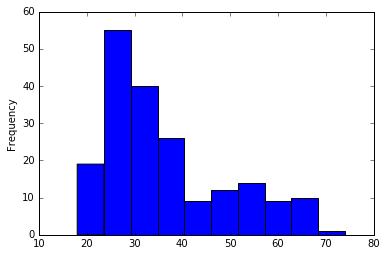

In [82]:
data['age'].plot.hist()

In [79]:
data.head()

,Unnamed: 0,bullshit1,bullshit2,bullshit3,bullshit4,bullshit5,bullshit6,bullshit7,bullshit8,bullshit9,...,FavorablenessClinton,FavorablenessSanders,FavorablenessOMalley,Conservatism,age,sex,country,who_first_presented,MeanBullshit,MeanMundane
0,1,4.0,3.0,4.0,2.0,4.0,4.0,3.0,3.0,3.0,...,1.0,5.0,3.0,7.0,32.0,2.0,1.0,Dem first,3.4,3.5
1,2,2.0,1.0,1.0,2.0,1.0,1.0,1.0,3.0,1.0,...,2.0,5.0,1.0,1.0,34.0,1.0,1.0,Rep first,1.5,2.7
2,3,3.0,3.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,...,4.0,5.0,3.0,3.0,25.0,2.0,1.0,Rep first,3.9,3.1
3,4,2.0,4.0,2.0,3.0,3.0,4.0,2.0,4.0,3.0,...,4.0,5.0,3.0,3.0,24.0,2.0,1.0,Rep first,3.0,3.5
4,5,2.0,2.0,1.0,3.0,2.0,3.0,2.0,2.0,2.0,...,4.0,4.0,NaN,1.0,35.0,2.0,1.0,Dem first,2.2,4.3


In [80]:
data.columns

Index([u'Unnamed: 0', u'bullshit1', u'bullshit2', u'bullshit3', u'bullshit4',
       u'bullshit5', u'bullshit6', u'bullshit7', u'bullshit8', u'bullshit9',
       u'bullshit10', u'mundane1', u'mundane2', u'mundane3', u'mundane4',
       u'mundane5', u'mundane6', u'mundane7', u'mundane8', u'mundane9',
       u'mundane10', u'FavorablenessTrump', u'FavorablenessCruz',
       u'FavorablenessRubio', u'FavorablenessClinton', u'FavorablenessSanders',
       u'FavorablenessOMalley', u'Conservatism', u'age', u'sex', u'country',
       u'who_first_presented', u'MeanBullshit', u'MeanMundane'],
      dtype='object')

Определим вспомогательную функцию

In [115]:
from sklearn.linear_model import LinearRegression
from scipy.stats import spearmanr, pearsonr, kendalltau
import statsmodels.api as sm
lowess = sm.nonparametric.lowess

def plot_bullshit_vs(column_name, data=data):
    x = data['MeanBullshit']
    y = data[column_name]
    
    to_remove_indices = np.logical_or(x.isnull(), y.isnull())
    x = x[np.logical_not(to_remove_indices)]
    y = y[np.logical_not(to_remove_indices)]
    
    spearmanr_res = spearmanr(x, y)
    
    plt.figure(figsize=(13.5, 9))
        
    plt.scatter(
        x, y + np.random.uniform(low=-0.1, high=0.1, size=len(y)),
        alpha=0.5, color='blue'
    )
    plt.title('Spearman p-value = {}, correlation estimate = {}'.format(spearmanr_res.pvalue, spearmanr_res.correlation))
    plt.xlabel('Bullshit Receptivity')
    plt.ylabel(column_name)
    
    plt.plot(*zip(*lowess(y, x)), color='black')
    
    lr = LinearRegression()
    lr.fit(np.array(x).reshape((len(x), 1)), y)
    plt.plot(x, lr.predict(np.array(x).reshape((len(x), 1))), color='red')
    
    plt.show()

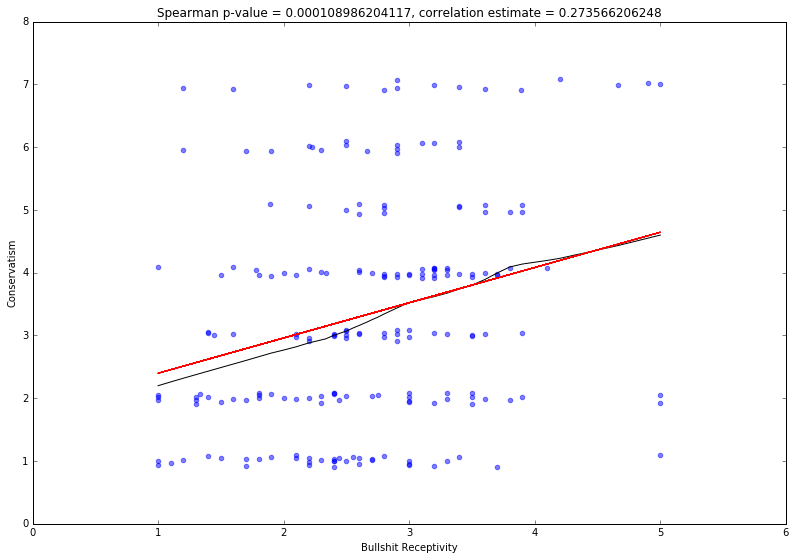

In [116]:
plot_bullshit_vs('Conservatism')

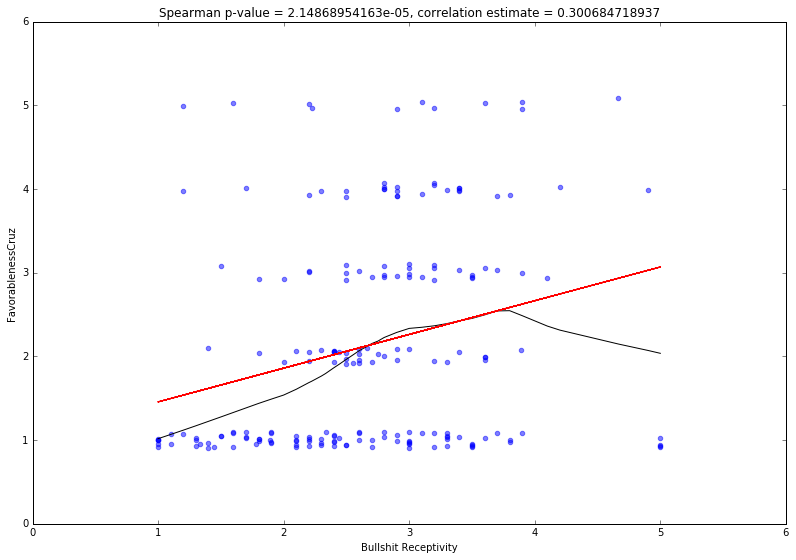

In [117]:
plot_bullshit_vs('FavorablenessCruz')

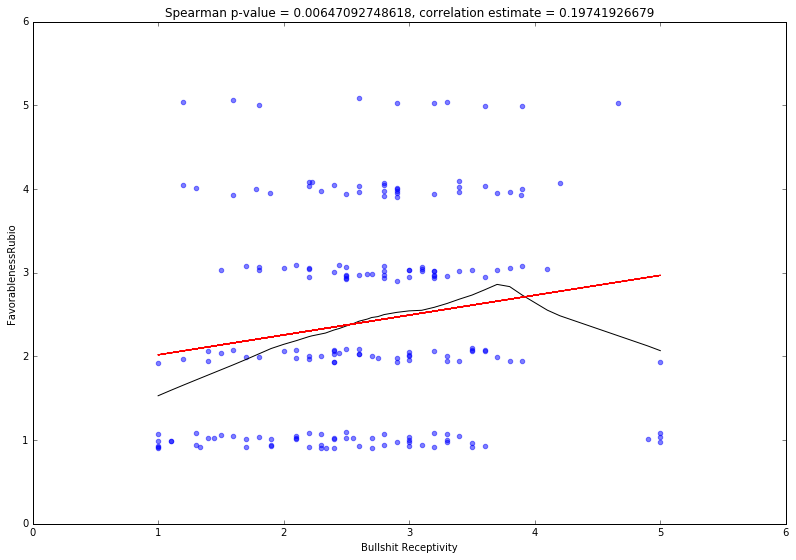

In [118]:
plot_bullshit_vs('FavorablenessRubio')

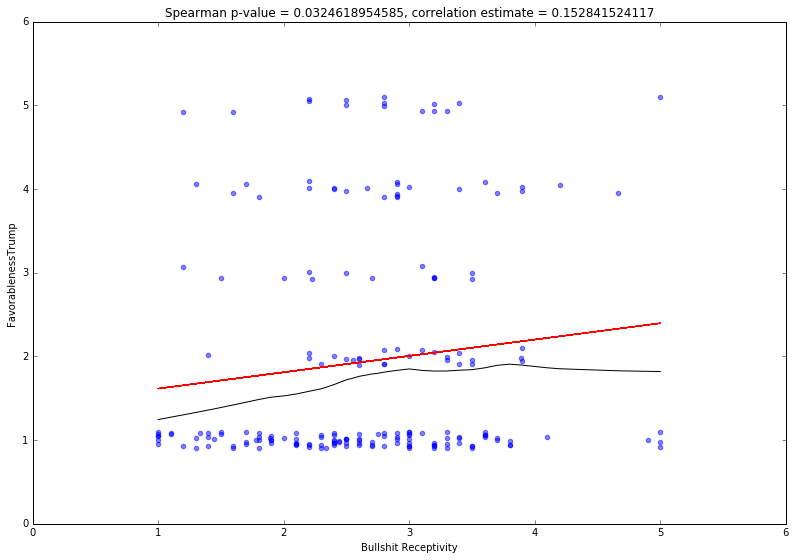

In [119]:
plot_bullshit_vs('FavorablenessTrump')

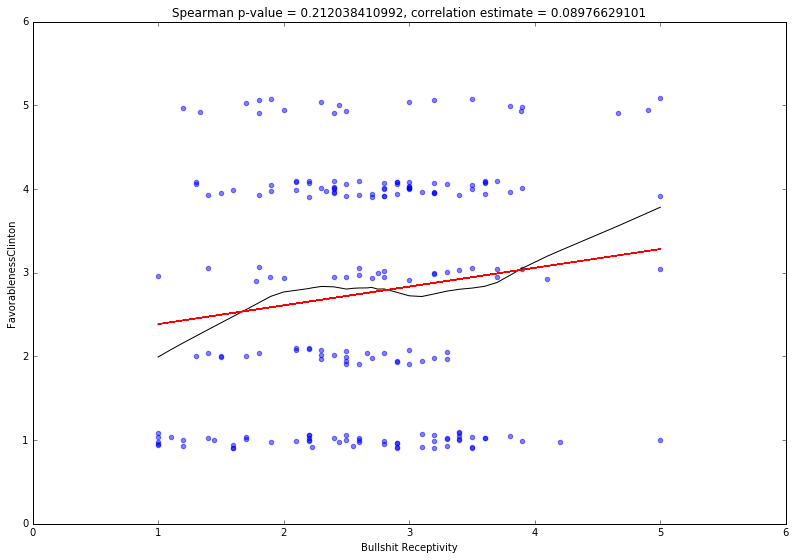

In [120]:
plot_bullshit_vs('FavorablenessClinton')

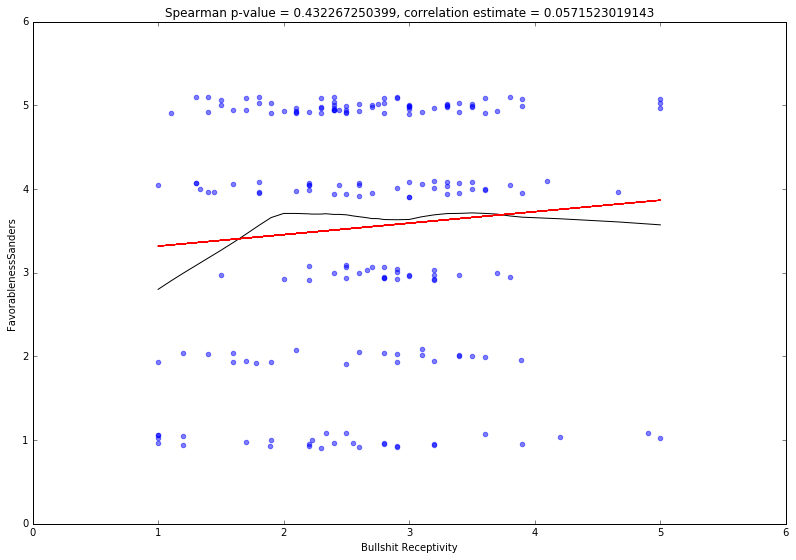

In [121]:
plot_bullshit_vs('FavorablenessSanders')

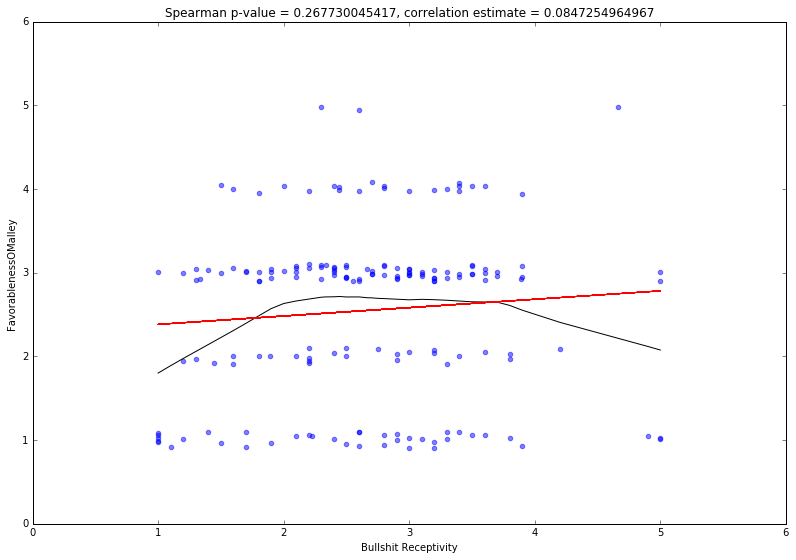

In [122]:
plot_bullshit_vs('FavorablenessOMalley')

In [91]:
def partial_corr(x, y, z):
    r_xy = kendalltau(x, y).correlation
    r_zx = kendalltau(x, z).correlation
    r_zy = kendalltau(y, z).correlation
    
    return (r_xy - r_zx * r_zy) / np.sqrt((1 - r_zx ** 2) * (1 - r_zy ** 2))
    

In [131]:
x = data['FavorablenessOMalley']
y = data['Conservatism']
z = data[[
    'FavorablenessClinton',
    'FavorablenessCruz',
    'FavorablenessOMalley',
    'FavorablenessRubio',
    'FavorablenessSanders',
    'FavorablenessTrump'
]].mean(axis=1)
    

to_remove_indices = np.logical_or(np.logical_or(x.isnull(), y.isnull()), z.isnull())
x = x[np.logical_not(to_remove_indices)]
y = y[np.logical_not(to_remove_indices)]
z = z[np.logical_not(to_remove_indices)]

In [132]:
partial_corr(x, y, z)

-0.23181442214284959